In [1]:
import os

import pandas as pd
import numpy as np

import plotly.express as px

from ray.tune import Analysis

In [8]:
sys.path.append(os.path.abspath('../src'))

from utils import ASSETS_DIR, standardise_column_names, correlation_matrix

In [3]:
# results = pd.read_json(os.path.join(ASSETS_DIR, 'results/', 'hpopt-results-sus-50.json'))

In [4]:
analysis = Analysis("/Users/adhaene/ray_results/invoke_run_2021-12-01_17-29-39")

In [5]:
result = analysis.dataframe()
result = standardise_column_names(result)

wanted_features = ['objective', 'config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr']
result.drop(columns=[f for f in result.columns if f not in wanted_features], inplace=True)

In [6]:
result

,objective,config_decay,config_distance,config_epochs,config_hidden_dim,config_layers,config_lr
0,0.653846,0.001,5.0,75,64,15,0.0100
1,0.575721,0.010,2.0,125,16,10,0.0001
2,0.722756,0.100,0.5,75,16,5,0.0001
3,0.648638,0.001,1.0,125,16,10,0.0010
4,0.460337,0.100,0.5,125,16,15,0.0001
...,...,...,...,...,...,...,...
139,0.711538,0.001,0.5,75,32,10,0.0010
140,0.564904,0.100,2.0,125,64,10,0.0010
141,0.816506,0.001,2.0,50,64,5,0.0001
142,0.570513,0.100,2.0,125,16,15,0.0001


In [32]:
px.parallel_coordinates(result, dimensions=['config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr'],
                        color='objective', color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.8)

In [21]:
melted = pd.melt(result, id_vars='objective', value_vars=['config_decay', 'config_distance', 'config_epochs', 'config_hidden_dim', 'config_layers', 'config_lr'])
melted

,objective,variable,value
0,0.653846,config_decay,0.0010
1,0.575721,config_decay,0.0100
2,0.722756,config_decay,0.1000
3,0.648638,config_decay,0.0010
4,0.460337,config_decay,0.1000
...,...,...,...
859,0.711538,config_lr,0.0010
860,0.564904,config_lr,0.0010
861,0.816506,config_lr,0.0001
862,0.570513,config_lr,0.0001


In [33]:
px.scatter(melted, x='value', y='objective', facet_col='variable') \
    .update_layout(height=500) \
    .update_xaxes(matches=None) \
    .update_xaxes(type="log", col=1) \
    .update_xaxes(type="log", col=6)

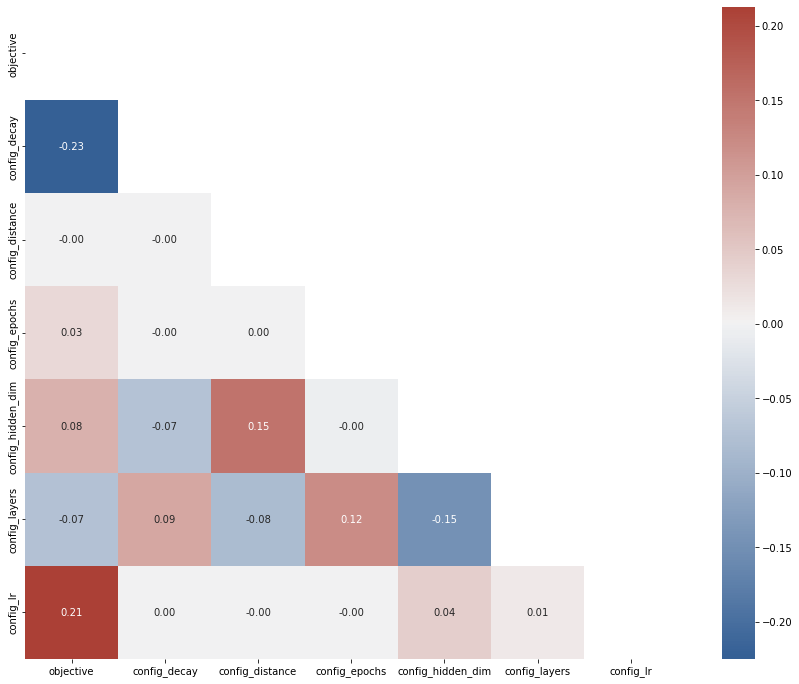

In [9]:
correlation_matrix(result)